In [ ]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
import pickle

with open('my_dataset.pickle', 'rb') as data:
    df = pickle.load(data)

In [3]:
with open('my_stat_feat.pickle', 'rb') as data_stat:
    features = pickle.load(data_stat)

### <ins>Point 1.</ins>

### <ins>Should we take only stat feats or all of them?.</ins>

In [4]:
X, X_test, y, y_test = train_test_split(
    df[features].values, # X  as numpy array
    df['label'].values, # y as numpy array
    stratify = df['label'], # stratify the dataset based on class labels
    train_size = 0.7, # percentage of training set
    random_state = 15 # for random choice of samples
)

In [5]:
X_train, X_validation, y_train, y_validation = train_test_split(
    df[features].values, # X  as numpy array
    df['label'].values, # y as numpy array
    stratify = df['label'], # stratify the dataset based on class labels
    train_size = 0.7143, # percentage of training set
    random_state = 15 # for random choice of samples
)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

### <ins>Point 2.</ins>

In [72]:
import random
# Converting np arrays into pd dataframes 
X_train_df=pd.DataFrame(X_train)
X_validation_df=pd.DataFrame(X_validation)
X_test_df=pd.DataFrame(X_test)
y_train_df=pd.DataFrame(y_train)
y_test_df=pd.DataFrame(y_test)
y_validation_df=pd.DataFrame(y_validation)
# Finding indexes of respective classes
y_lossy = y_train_df.groupby(0).get_group(1).index
y_lossless = y_train_df.groupby(0).get_group(0).index
# Starting length of balanced dataset is the number of lossy windows
num_of_el_to_pick = len(y_lossy)
# Randomly sampling indexes in the classes without repetition
index_lossy = random.sample(sorted(set(y_lossy)),num_of_el_to_pick)
index_lossless = random.sample(sorted(set(y_lossless)),num_of_el_to_pick)
# Locate elements for respective classes
df_lossless = X_train_df.loc[index_lossless]
df_lossy = X_train_df.loc[index_lossy]
# Creating balanced datasets
X_balanced = pd.concat([df_lossless, df_lossy])
Y_balanced = pd.concat([y_train_df.loc[index_lossless], y_train_df.loc[index_lossy]])
X_balanced_np = X_balanced.to_numpy()
Y_balanced_np = Y_balanced.to_numpy()

### <ins>Point 3.</ins>

The 3 ML methods chosen to be applied to a classification task based on the two labels (lossless and lossy windows) are: 
-  KNeighborsClassifier()
-  DecisionTreeRegressor()
-  RandomForestClassifier()

After the training, the respective methods will be tested with on both the training set and the validation set, also printing their classification reports to display their prediction's accuracy.

In [73]:
m1 = KNeighborsClassifier()
m1.fit(X_balanced_np, Y_balanced_np.ravel())
y_train_pred1 = m1.predict(X_balanced_np)
y_validation_pred1 = m1.predict(X_validation)

In [25]:
print(f'Classification report on the training set: \n\n {classification_report(Y_balanced_np, y_train_pred1)}')

Classification report on the training set: 

               precision    recall  f1-score   support

           0       0.94      0.96      0.95     22015
           1       0.95      0.94      0.95     22015

    accuracy                           0.95     44030
   macro avg       0.95      0.95      0.95     44030
weighted avg       0.95      0.95      0.95     44030



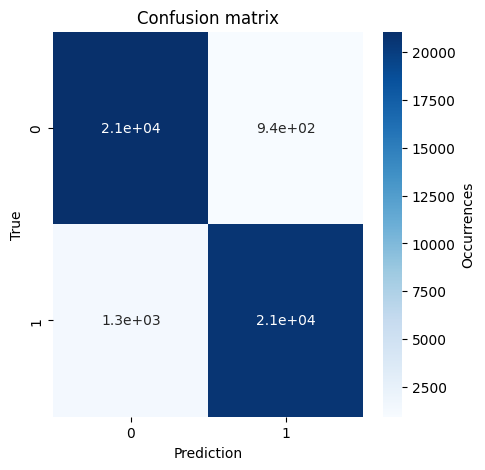

In [74]:
confusion_test = confusion_matrix(Y_balanced_np, y_train_pred1)

# visualize the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

In [28]:
print(f'Classification report on the validation set: \n\n {classification_report(y_validation, y_validation_pred1)}')

Classification report on the validation set: 

               precision    recall  f1-score   support

           0       1.00      0.94      0.97    601527
           1       0.17      0.91      0.29      8805

    accuracy                           0.94    610332
   macro avg       0.59      0.92      0.63    610332
weighted avg       0.99      0.94      0.96    610332



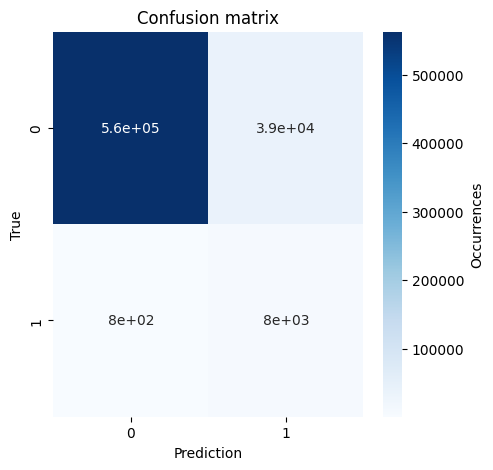

In [75]:
confusion_test = confusion_matrix(y_validation, y_validation_pred1)

# visualize the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

In [76]:
m2 = DecisionTreeRegressor()
m2.fit(X_balanced_np, Y_balanced_np.ravel())
y_train_pred2 = m2.predict(X_balanced_np)
y_validation_pred2 = m2.predict(X_validation)

In [42]:
print(f'Classification report on the training set: \n\n {classification_report(Y_balanced_np, y_train_pred2)}')

Classification report on the training set: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22015
           1       1.00      1.00      1.00     22015

    accuracy                           1.00     44030
   macro avg       1.00      1.00      1.00     44030
weighted avg       1.00      1.00      1.00     44030



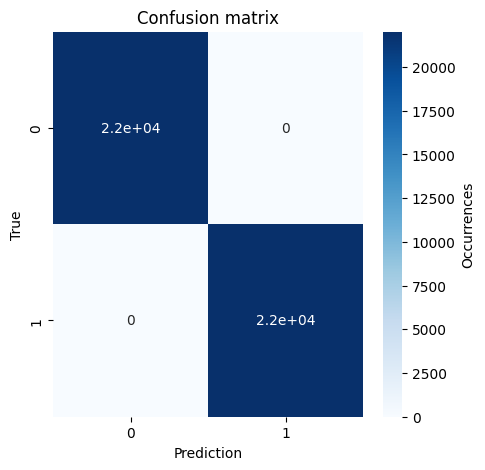

In [77]:
confusion_test = confusion_matrix(Y_balanced_np, y_train_pred2)

# visualize the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

In [43]:
print(f'Classification report on the validation set: \n\n {classification_report(y_validation, y_validation_pred2)}')

Classification report on the validation set: 

               precision    recall  f1-score   support

           0       1.00      0.93      0.96    601527
           1       0.16      0.92      0.28      8805

    accuracy                           0.93    610332
   macro avg       0.58      0.93      0.62    610332
weighted avg       0.99      0.93      0.95    610332



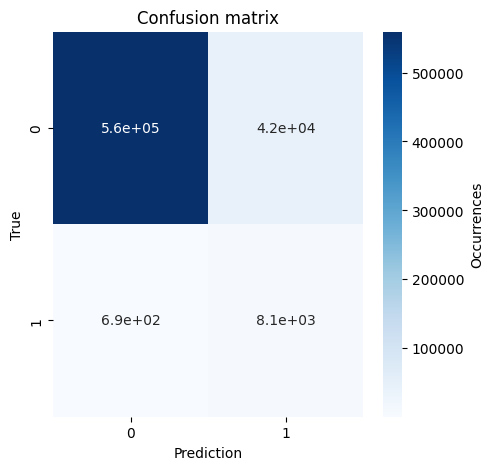

In [78]:
confusion_test = confusion_matrix(y_validation, y_validation_pred2)

# visualize the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

In [79]:
m3 = RandomForestClassifier()
m3.fit(X_balanced_np, Y_balanced_np.ravel())
y_train_pred3 = m3.predict(X_balanced_np)
y_validation_pred3 = m3.predict(X_validation)

In [33]:
print(f'Classification report on the training set: \n\n {classification_report(Y_balanced_np, y_train_pred3)}')

Classification report on the training set: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22015
           1       1.00      1.00      1.00     22015

    accuracy                           1.00     44030
   macro avg       1.00      1.00      1.00     44030
weighted avg       1.00      1.00      1.00     44030



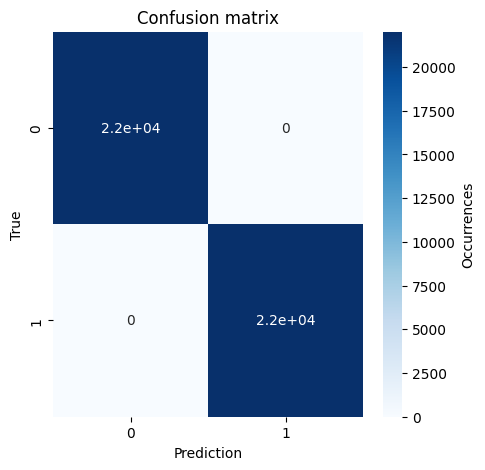

In [80]:
confusion_test = confusion_matrix(Y_balanced_np, y_train_pred3)

# visualize the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

In [34]:
print(f'Classification report on the validation set: \n\n {classification_report(y_validation, y_validation_pred3)}')

Classification report on the validation set: 

               precision    recall  f1-score   support

           0       1.00      0.95      0.97    601527
           1       0.22      0.95      0.36      8805

    accuracy                           0.95    610332
   macro avg       0.61      0.95      0.67    610332
weighted avg       0.99      0.95      0.97    610332



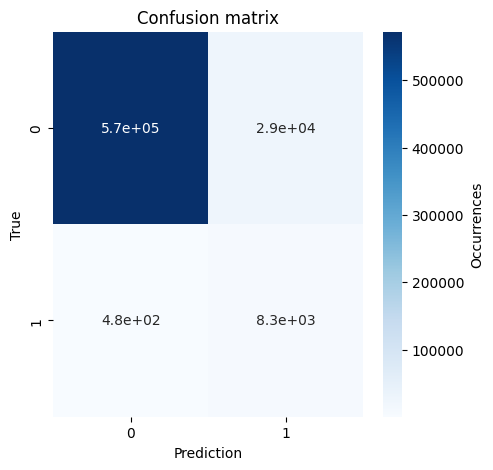

In [81]:
confusion_test = confusion_matrix(y_validation, y_validation_pred3)

# visualize the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

In [ ]:
gnb = GaussianNB()
gnb.fit(X_balanced, Y_balanced)
y_test_pred = gnb.predict(X_test)

print(classification_report(y_test, y_test_pred))

### <ins>We choose RandomForest because has better performances on 1 detection accuracy.</ins>

### <ins>Point 4.</ins>

In [59]:
# Loop for increasing progressively the dimension of the lossless class
for increase_percentage in range(5,15,2):
    # Imbalanced dataset generation
    num_of_lossless_to_pick = len(y_lossy) + int(np.ceil(increase_percentage*len(y_lossless)/100))
    index_lossless = random.sample(sorted(set(y_lossless)),num_of_lossless_to_pick)
    df_lossless = X_train_df.loc[index_lossless]
    X_augmented = pd.concat([df_lossless, df_lossy])
    Y_balanced = pd.concat([y_train_df.loc[index_lossless], y_train_df.loc[index_lossy]])
    X_augmented_np = X_augmented.to_numpy()
    Y_balanced_np = Y_balanced.to_numpy()
    # ML section
    T1 = RandomForestClassifier()
    T1.fit(X_augmented_np, Y_balanced_np.ravel())
    y_train_pred_T1 = T1.predict(X_augmented_np)
    y_validation_pred_T1 = T1.predict(X_validation)
    # Print classification report
    print(f'Classification report on the training set with an increase in class 0 of {increase_percentage}%: \n\n {classification_report(Y_balanced_np, y_train_pred_T1)}')
    print(f'Classification report on the validation set with an increase in class 0 of {increase_percentage}%: \n\n {classification_report(y_validation, y_validation_pred_T1)}')

Classification report on the training set with an increase in class 0 of 5%: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     97212
           1       1.00      1.00      1.00     22015

    accuracy                           1.00    119227
   macro avg       1.00      1.00      1.00    119227
weighted avg       1.00      1.00      1.00    119227

Classification report on the validation set with an increase in class 0 of 5%: 

               precision    recall  f1-score   support

           0       1.00      0.99      0.99    601527
           1       0.54      0.88      0.67      8805

    accuracy                           0.99    610332
   macro avg       0.77      0.93      0.83    610332
weighted avg       0.99      0.99      0.99    610332

Classification report on the training set with an increase in class 0 of 7%: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    12

### <ins>Point 5.</ins>

### <ins>Maybe this can be cancelled?</ins>

In [ ]:
# e.g., RF - parameters to be optimizaed:
    # n_estimators: number of trees
    # max_depth: the maximum depth of trees

# iterate over all possible combinations
'''
for n_estimators in range(10, 50, 100):
    for max_depth in [2, 3, 4, 5, None]:
        # initialize and fit a model per pair of parameters
        rf_tmp = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12)
        rf_tmp.fit(X_balanced3_np, Y_balanced3_np)
        # here we only refer to accuracy for simplicity
        acc_train = accuracy_score(Y_balanced3_np, rf_tmp.predict(X_balanced3_np))
        acc_val = accuracy_score(y_validation, rf_tmp.predict(X_validation))
        print(f'number_trees: {n_estimators}, max depth: {max_depth}, accuracy: train - {acc_train} | val - {acc_val}')
'''        

In [61]:
parameters = {'n_estimators':[10, 50, 100] , 'max_depth':[2, 3, 4, 5, None]}
svc = RandomForestClassifier()
clf = GridSearchCV(svc, parameters,)
clf.fit(X_augmented_np, Y_balanced_np.ravel())
print(clf.best_estimator_)

RandomForestClassifier()


In [71]:
print(clf.best_params_) # this is the most useful attribute
print(clf.classes_)     # these are the labels
print(clf.best_score_)  # overall score can be used for comparison
#print(clf.cv_results_) # output way too long and not that informative
print(clf.best_index_)  # don't know what it does represent

{'max_depth': None, 'n_estimators': 100}
[0 1]
0.9800993571011105
14


In [ ]:
print('End!')